# LABORATORIO 6


Este es un entrenamiento y prueba de aprendizaje por refuerzo del juego de carta Black Jack 
donde elaboramos un modelo que logra jugar el juego de una manera efectiva

Grupo 4
Integrantes 
Aly Delgado Danner Abel 
Lujan Renteria 
Itzel Emily Velasquez Guerra 
Julio Cesar Ortega Albarado
Rojas Vasquez Sheila

Episodio: 1 - Recompensa total: -1.0
Episodio: 2 - Recompensa total: -1.0
Episodio: 3 - Recompensa total: 0.0
Episodio: 4 - Recompensa total: -1.0
Episodio: 5 - Recompensa total: 1.0
Episodio: 6 - Recompensa total: 1.0
Episodio: 7 - Recompensa total: -1.0
Episodio: 8 - Recompensa total: 1.0
Episodio: 9 - Recompensa total: -1.0
Episodio: 10 - Recompensa total: 0.0
Episodio: 11 - Recompensa total: 1.0
Episodio: 12 - Recompensa total: 1.0
Episodio: 13 - Recompensa total: 1.0
Episodio: 14 - Recompensa total: -1.0
Episodio: 15 - Recompensa total: -1.0
Episodio: 16 - Recompensa total: 1.0
Episodio: 17 - Recompensa total: 1.0
Episodio: 18 - Recompensa total: 1.0
Episodio: 19 - Recompensa total: -1.0
Episodio: 20 - Recompensa total: -1.0
Episodio: 21 - Recompensa total: 1.0
Episodio: 22 - Recompensa total: 1.0
Episodio: 23 - Recompensa total: -1.0
Episodio: 24 - Recompensa total: 1.0
Episodio: 25 - Recompensa total: 1.0
Episodio: 26 - Recompensa total: -1.0
Episodio: 27 - Recompensa total: -1.

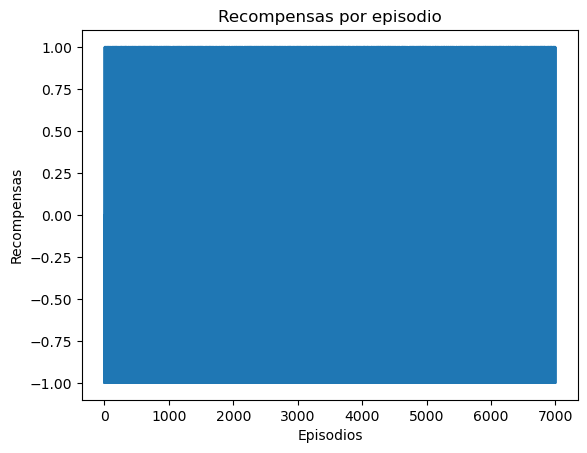

In [7]:
import gymnasium as gym
import numpy as np
import pickle  # Para guardar y cargar la Q-table
import matplotlib.pyplot as plt

# Inicializar el entorno
env = gym.make("Blackjack-v1", natural=False, render_mode="human")

# Parámetros de Q-learning
alpha = 0.1     # Tasa de aprendizaje
gamma = 0.99    # Factor de descuento
epsilon = 0.1   # Tasa de exploración

# Inicializar Q-table con ceros para cada combinación posible de estado y acción
q_table = {}
for player_sum in range(4, 22):               # Suma actual del jugador (4 a 21)
    for dealer_card in range(1, 11):           # Carta visible del crupier (1 a 10)
        for usable_ace in [0, 1]:              # As utilizable (0 o 1)
            q_table[(player_sum, dealer_card, usable_ace)] = [0, 0]  # Inicializar valores de acción (stand, hit)

# Definir la política de acción (ε-greedy)
def choose_action(state, training=True):
    if training and np.random.rand() < epsilon:
        return env.action_space.sample()  # Explorar: elegir acción aleatoriamente
    else:
        return np.argmax(q_table[state])  # Explotar: elegir la mejor acción según Q-table

# Entrenar el agente con Q-learning
rewards_per_episode = []

for episode in range(7000):  # Número de episodios para entrenar
    state, info = env.reset()  # Quitar la semilla para obtener variabilidad en cada episodio
    done = False
    total_rewards = 0
    
    while not done:
        player_sum, dealer_card, usable_ace = state
        action = choose_action(state)

        # Tomar el paso en el entorno y recibir el nuevo estado y recompensa
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Actualizar Q-table usando la ecuación de Q-learning
        if not done:
            next_action = np.argmax(q_table[next_state])
            q_table[state][action] = q_table[state][action] + alpha * (
                reward + gamma * q_table[next_state][next_action] - q_table[state][action]
            )
        else:
            # Si el episodio terminó, no hay siguiente estado; solo usar la recompensa
            q_table[state][action] = q_table[state][action] + alpha * (reward - q_table[state][action])

        # Actualizar el estado
        state = next_state
        total_rewards += reward

    rewards_per_episode.append(total_rewards)
    print(f"Episodio: {episode + 1} - Recompensa total: {total_rewards}")

# Guardar la Q-table en un archivo
with open("q_table_blackjack.pkl", "wb") as file:
    pickle.dump(q_table, file)

# Cerrar el entorno después de entrenar
env.close()

# Imprimir la Q-table
print("Q-table final:")
for state, actions in q_table.items():
    print(f"Estado: {state}, Acciones: {actions}")

# Graficar las recompensas
plt.plot(range(7000), rewards_per_episode)
plt.xlabel('Episodios')
plt.ylabel('Recompensas')
plt.title('Recompensas por episodio')
plt.show()

In [10]:

# Prueba del agente después de entrenar usando la Q-table guardada
def test_agent(num_episodes=100):
    wins, losses, draws = 0, 0, 0
    
    # Cargar la Q-table guardada
    with open("q_table_blackjack.pkl", "rb") as file:
        q_table = pickle.load(file)
    
    # Inicializar el entorno sin renderizado
    env = gym.make("Blackjack-v1", natural=False)
    
    # Jugar con el agente entrenado
    for _ in range(num_episodes):
        state, info = env.reset()  # Quitar la semilla para variabilidad en cada partida
        done = False
        
        while not done:
            action = np.argmax(q_table[state])  # Seleccionar la mejor acción según la Q-table
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            state = next_state
        
        # Contabilizar los resultados
        if reward >= 1:
            wins += 1
            print("Ganó")
        elif reward == -1:
            losses += 1
            print("Perdió")
        else:
            draws += 1
    
    print(f"Resultados tras {num_episodes} episodios:")
    print(f"Victorias: {wins}")
    print(f"Derrotas: {losses}")
    print(f"Empates: {draws}")

# Ejecutar el test del agente
test_agent()

Ganó
Perdió
Perdió
Ganó
Ganó
Perdió
Perdió
Ganó
Perdió
Perdió
Ganó
Perdió
Ganó
Ganó
Perdió
Perdió
Perdió
Ganó
Ganó
Perdió
Perdió
Ganó
Ganó
Ganó
Perdió
Perdió
Ganó
Perdió
Perdió
Ganó
Perdió
Perdió
Perdió
Perdió
Perdió
Perdió
Ganó
Ganó
Ganó
Perdió
Ganó
Perdió
Perdió
Ganó
Perdió
Ganó
Ganó
Perdió
Perdió
Perdió
Perdió
Perdió
Ganó
Ganó
Ganó
Perdió
Perdió
Ganó
Ganó
Perdió
Perdió
Ganó
Perdió
Ganó
Perdió
Perdió
Ganó
Perdió
Perdió
Perdió
Ganó
Perdió
Ganó
Ganó
Ganó
Perdió
Ganó
Perdió
Ganó
Perdió
Perdió
Perdió
Perdió
Ganó
Ganó
Ganó
Perdió
Perdió
Ganó
Resultados tras 100 episodios:
Victorias: 39
Derrotas: 50
Empates: 11
